# Model Data Generator 

This notebook is designed to generate fake data sets from an underlying model, injecting normally distributed randomness to describe discrepencies between observations. 

In [1]:
%matplotlib notebook

In [2]:
import os 
import random

import numpy as np 
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [3]:
def add_collinear_features(n, X):
    """
    Add n collinear features to X
    """
    if not n:
        return X 

    for _ in range(n):
        # select random column 
        col = X[:,random.randint(0, X.shape[1]-1)]
        col = col * np.random.uniform(-10, 10, 1) + np.random.normal(0, 6, 1)
        col = col.reshape(col.shape[0], 1)
        
        X = np.append(X, col, 1)

    return X 

def generate_normal_model(n, coefs, bias=0.0, mean=0.0, scale=1.0, randscale=1.0, collinearity=0):
    """
    Generates a normally distributed model of n samples for the
    specified coeficients, can also include a bias parameter. 
    If the coefs is an integer, generates a random array of coefs
    whose length is the integer passed in. 
    
    mean and scale refer to the randomness of the X vectors. 
    randscale refers to the amount of randomness added to the target
    
    The model can also add n collinear features, determined by the 
    collinearity parameter. 
    
    This function returns a 2 dimensional X array, a target vector 
    Y and the coefs that may have been generated.
    
    Note that this returns standardized vectors by default.
    """
    if isinstance(coefs, int):
        coefs = np.random.uniform(-10.0, 10, coefs)
    
    # Create an (n, k) matrix of data 
    k = len(coefs)
    X = np.random.normal(mean, scale, (n, k))
    
    # Add collinear features 
    X = add_collinear_features(collinearity, X)
    coefs = np.append(coefs, np.random.uniform(-10.0, 10, collinearity))
    
    # Compute y and add normally distributed random error
    y = np.dot(X, coefs) + bias 
    y += np.random.normal(0.0, randscale, n)

    # Return the data sets 
    return X,y, coefs

<IPython.core.display.Javascript object>


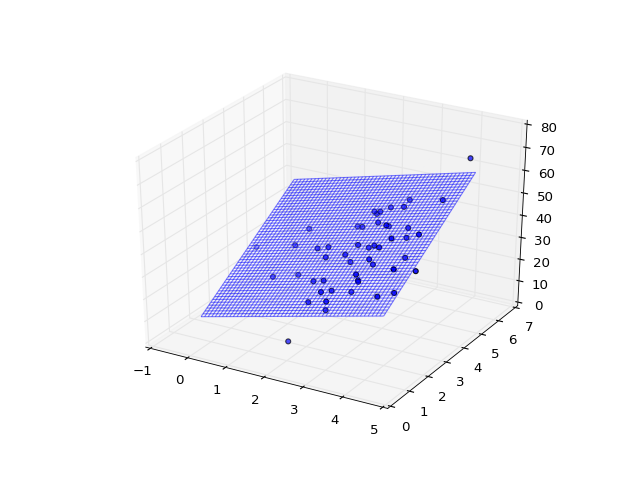

In [4]:
def plot_model(n, coefs=1, bias=0.0, mean=0.0, scale=1.0, randscale=1.0, collinearity=0):
    """
    Draw a random model with specified parameters. 
    """
    if isinstance(coefs, int):
        if coefs > 2 or coefs < 1: 
            raise ValueError("can only plot 1 or 2 coefs")
    elif isinstance(coefs, list):
        if len(coefs) > 2 or len(coefs) < 1:
            raise ValueError("can only plot 1 or 2 coefs")
    else:
        raise TypeError("unknown coefs type.")
    
    # Generate the model 
    X, y, coefs = generate_normal_model(n, coefs, bias, mean, scale, randscale, collinearity)
    
    # Determine if 2D or 3D 
    fig = plt.figure()
    if len(coefs) == 2:
        ax = fig.add_subplot(111, projection='3d')
        
        ax.scatter(X[:,0], X[:,1], y)
        
        xm, ym = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max()), np.linspace(X[:,1].min(), X[:,1].max()))
        zm = coefs[0]*xm + coefs[1]*ym + bias 
        
        ax.plot_wireframe(xm, ym, zm, alpha=0.5)
    
    else:
        ax = fig.add_subplot(111)
    
        ax.scatter(X, y)
        Xm = np.linspace(X.min(), X.max()).reshape(X.shape[0], 1)
        ym = np.dot(Xm, coefs) + bias 
        ax.plot(Xm, ym)

    plt.show()

plot_model(50, 2, 3, 3, 1.0, 4.0)

In [5]:
def save_data(path, X, y, w, suffix=""):
    """
    Writes data out to a directory, specified by the path. 
    """
    data = os.path.join(path, "dataset{}.txt".format(suffix))
    target = os.path.join(path, "target{}.txt".format(suffix))
    coefs = os.path.join(path, "coefs{}.txt".format(suffix))
    
    np.savetxt(data, X)
    np.savetxt(target, y)
    np.savetxt(coefs, w)

In [6]:
X, y, w = generate_normal_model(10000, 18, bias=0.0, mean=6.3, scale=1.0, randscale=3.0, collinearity=0)
save_data("../data/generated", X, y, w)

In [7]:
X, y, w = generate_normal_model(10000, 10, bias=0.0, mean=6.3, scale=1.0, randscale=23.0, collinearity=8)
save_data("../data/generated", X, y, w, "-collin")

In [8]:
X, y, w = generate_normal_model(100, 1, bias=0.0, mean=6.3, scale=1.0, randscale=3.0, collinearity=0)
save_data("../data/generated", X, y, w, "-demo")